[Think Stats Chapter 4 Exercise 2](http://greenteapress.com/thinkstats2/html/thinkstats2005.html#toc41) (a random distribution)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

This questions asks you to examine the function that produces random numbers. Is it really random? 

This notebook has been converted to a markdown file using [convert_notebooks_to_markdown.py](./convert_notebooks_to_markdown.py).

# Answer

The values generated computationally by random number generators are pseudorandom. Thus, they don't actually have the same probability. The plot on the left of the CDFs for array with two different seeds shows deviations from the expected line (shown in gray). (**NOTE:** I skipped the PMF plot on purpose. It doesn't really show useful information and Allen's libraries perform significant manipulations on the data to actually make this plot viewable.)

A related observation that is both useful and dangerous (depending on the situation) is that an identical array will be produced whenever the random number generator is initiated to the same state.

There was recently an excellent article on pitfalls with random number generation on a [blog that I read](http://www.johndcook.com/blog/2016/01/29/random-number-generator-seed-mistakes/).

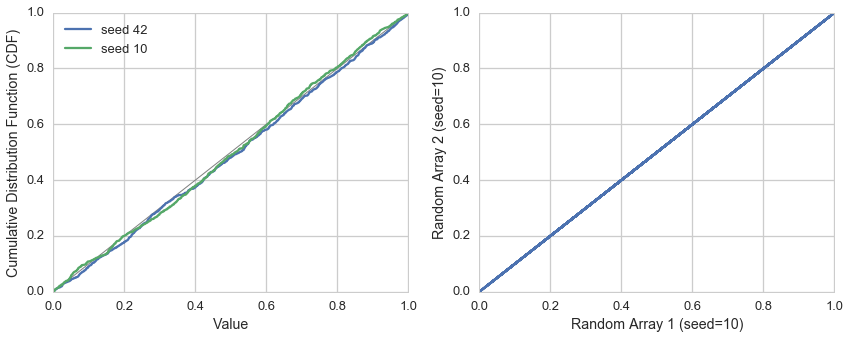

In [6]:
plt.show()

In [7]:
print('The two arrays from the random number generator with the same state are identical: {}'.format(are_identical))

The two arrays from the random number generator with the same state are identical: True


# Code

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.close_figures = False

Some helper functions for generating random arrays, PMFs, and CDFs.

In [2]:
def generate_array(size):
    # Generate a random array of specified size
    return np.array(map(lambda x: random.random(), range(size)))

def make_PMF(random_array):
    # A function to sort a random arry and return a dataframe
    # consisting of values and normalized probabilities
    
    random_array = random_array.copy()
    
    pmf_array = pd.DataFrame({'value':sorted(random_array), 
                              'prob':[1]*len(random_array)},
                             columns=['value', 'prob'])
    pmf_array = (pmf_array
                 .groupby('value')
                 .sum()
                 .sort_index()
                 .reset_index()
                 )
    
    pmf_array['prob'] /= np.float(pmf_array.prob.sum())
    
    return pmf_array


def make_CDF(pmf_array):
    # Convert a PMF into a CDF
    
    cdf_array = pmf_array.copy()
    cdf_array['prob'] = cdf_array.prob.cumsum()
    
    return cdf_array

## Random sampling and distributions
Generate arrays with 1000 randomly sampled values from a uniform distribution. This is done with two different random seeds (42 and 10). For the second random seed, two random arrays are generated from the same starting state to further demonstrate that the random number generator is pseudo-random.

In [3]:
size = 1000

# Random data with seed of 42
random.seed(42)

rand_42 = generate_array(size)
pmf_42 = make_PMF(rand_42)
cdf_42 = make_CDF(pmf_42)

# Random data with seed of 10
random.seed(10)
state = random.getstate()

rand_10 = generate_array(size)
pmf_10 = make_PMF(rand_10)
cdf_10 = make_CDF(pmf_10)

random.setstate(state)
rand_10_2 = generate_array(size) # second random array

## Similarity of arrays with same seed

It is easy to demonstrate that random arrays generated from a random number generator with the same starting state will be identical.

In [4]:
are_identical = np.allclose(rand_10, rand_10_2)
print('The two arrays from the random number generator with the same state are identical: {}'.format(are_identical))

The two arrays from the random number generator with the same state are identical: True


## Visualize PMFs and CDFs

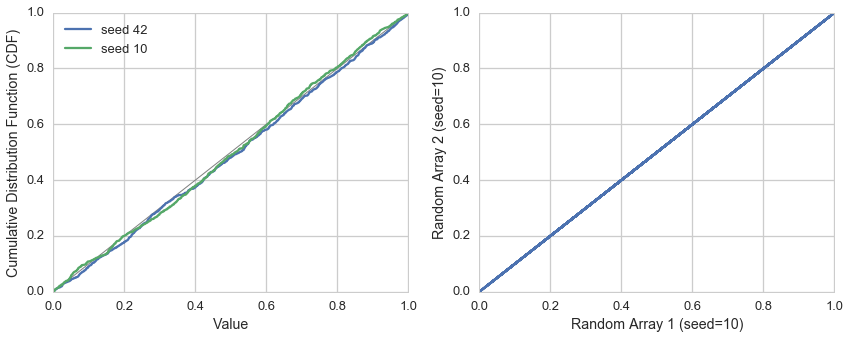

In [5]:
sns.set_context('talk')
sns.set_style('whitegrid')

fig, [ax1, ax2] = plt.subplots(ncols=2)
fig.set_size_inches(14, 5)

ax1.plot([0,1], [0,1], color='gray', lw=1.0)
cdf_42.plot('value', 'prob', ax=ax1, label='seed 42')
cdf_10.plot('value', 'prob', ax=ax1, label='seed 10')

ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.set_xlabel('Value')
ax1.set_ylabel('Cumulative Distribution Function (CDF)')
ax1.legend(loc=0)

ax2.plot(rand_10, rand_10_2, marker='', ls='-')
ax2.set_xlabel('Random Array 1 (seed=10)')
_ = ax2.set_ylabel('Random Array 2 (seed=10)')